In [2]:
#!git clone https://github.com/karlstratos/doe.git

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### データの生成（Gaussian）

In [95]:
# 期待値と分散共分散行列の準備
rho = 0.5
d = 1
mean = np.array([0, 0])
cov = np.array([[1, rho], [rho, 1]])
I = -d*np.log(1-rho**2)/2
print("相互情報量(ground truth)：",I)

相互情報量(ground truth)： 0.14384103622589045


In [102]:
# numpy を用いた生成
dataset_x = []
dataset_y = []


for _ in range(1000):
    data = np.random.multivariate_normal(mean, cov, size=d)
    data_x = data[:,0]
    data_y = data[:,1]
    # dataset_x.append(list(data_x))
    # dataset_y.append(list(data_y))
    dataset_x.append(data[0][0])
    dataset_y.append(data[0][1])

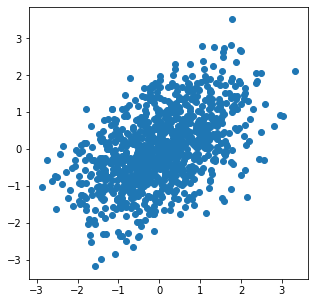

In [103]:
plt.figure(figsize=(5,5))
plt.scatter(dataset_x,dataset_y)

In [104]:
sprho, p_value = stats.spearmanr(dataset_x, dataset_y)
tau, p_value = stats.kendalltau(dataset_x, dataset_y)
sprho,tau

(0.49021000621000616, 0.33772972972972976)

### $I(X, Y) = H(X) + H(Y) − H(X, Y) = -H(C)$

### Truth

In [105]:
import math
def entropy_of_gaussian(mu,rho):
    return (1+math.log(2*math.pi*rho*rho))/2

h_x = entropy_of_gaussian(0,1)
h_y = entropy_of_gaussian(0,1)
h_x,h_y

(1.4189385332046727, 1.4189385332046727)

In [83]:
h_xy = h_x+h_y-I
h_xy

0.879359292783501

### simple
- https://arxiv.org/pdf/cond-mat/0305641.pdf

$H(X)≈ \frac{1}{N−1} \sum_{i=1}^{N-1} \log(x_{i+1} −x_i)+ψ(1)−ψ(N)$

In [84]:
from scipy.special import psi

In [87]:
def naive_KNN(x_raw):
    x = sorted(x_raw)
    N = len(x)
    return sum([np.log(x[i]-x[i-1]) for i in range(1,N)])/(N-1) + (psi(1)-psi(N))

In [106]:
print("H(X)のnaiveな推定")
naive_KNN(dataset_x)

H(X)のnaiveな推定


-13.55177449253326

#### KNN based MI estimator
- https://arxiv.org/pdf/cond-mat/0305641.pdf
- $ψ(k)+ψ(n)−k1−n1􏰐n 􏰕ψ(nx(i))+ψ(ny(i))$

In [75]:
def KSG(x_raw,k):
    N = len(x_raw)
    return psi(k)+psi(N)-1/k-sum([psi(calc_n(x,i))+psi(calc_n(y,i)) for i in range(N)])/N

### EDGEworth法
- http://proceedings.mlr.press/v4/suzuki08a/suzuki08a.pdf

### 最小情報コピュラを用いてhat(τ)から相互情報量を推定

- $H[x]=\frac{1}{2}(1+ln(2\pi \sigma^2))$

In [65]:
def calc_negentropy(mat):
    res = 0
    for i in range(len(mat)):
        for j in range(len(mat[0])):
            if mat[i][j] != 0:            
                res += mat[i][j]*np.log(mat[i][j])
    return res

In [66]:
spr, p_value = stats.spearmanr(dataset_x, dataset_y)
print("ρ:",spr)
tau, p_value = stats.kendalltau(dataset_x, dataset_y)
print("τ:",tau)

ρ: 0.4615036735036735
τ: 0.3183103103103103


In [67]:
mick = np.load("greedymick30-tau-0.318.npy")
mics = np.load("greedymics30-rho-0.461.npy")

In [68]:
print(calc_negentropy(mick))
print(calc_negentropy(mics))

-6.797619658558861
-5.472433320721932
